# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
!cat api_keys.py

# OpenWeatherMap API Key
weather_api_key = "e03356a0ce25d940217bf57988fa5332"

# Geoapify API Key
geoapify_key = "68e79185172a472c82d20c673f6a5628"


In [38]:
geoapify_key


'68e79185172a472c82d20c673f6a5628'

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [40]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

In [41]:
weather_api_key


'e03356a0ce25d940217bf57988fa5332'

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(json.dumps(city_weather, indent=4, sort_keys=True))
        
#     except Exception as e:
#         print(e)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
Processing Record 1 of Set 1 | tosontsengel
{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 48.7567,
        "lon": 98.2839
    },
    "dt": 1701111187,
    "id": 1515167,
    "main": {
        "feels_like": -22.06,
        "grnd_level": 831,
        "humidity": 99,
        "pressure": 1045,
        "sea_level": 1045,
        "temp": -22.06,
        "temp_max": -22.06,
        "temp_min": -22.06
    },
    "name": "Tosontsengel",
    "sys": {
        "country": "MN",
        "sunrise": 1701132829,
        "sunset": 1701164146
    },
    "timezone": 25200,
    "visibility": 4736,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 282,
        "gust": 1.13,
        "speed": 0.9
    }
}
Processing Record 2 of Set 1 | port-aux-francais
{
    "base": "statio

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 22.0752,
        "lon": -159.319
    },
    "dt": 1701111111,
    "id": 5848280,
    "main": {
        "feels_like": 23,
        "humidity": 90,
        "pressure": 1015,
        "temp": 22.36,
        "temp_max": 23.99,
        "temp_min": 21.22
    },
    "name": "Kapaa",
    "rain": {
        "1h": 1.81
    },
    "sys": {
        "country": "US",
        "id": 2005473,
        "sunrise": 1701104239,
        "sunset": 1701143573,
        "type": 2
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 6.17
    }
}
Processing Record 12 of Set 1 | asau
{
    "base": "stations",
    "clouds": {
        "all": 35
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": -22.2292,
        "lon": -50.8931
    },
    "dt": 1701111193,
    "id": 3451856,
    "main": {
        "feels_like": 32.16,
        "grnd_level": 954,
        "humidity": 48,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 30.95,
        "temp_max": 30.95,
        "temp_min": 30.95
    },
    "name": "Rancharia",
    "sys": {
        "country": "BR",
        "sunrise": 1701073868,
        "sunset": 1701121889
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 11,
        "gust": 2.71,
        "speed": 1.33
    }
}
Processing Record 22 of Set 1 | adamstown
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 15.8369,
        "lon": -97.0419
    },
    "dt": 1701111196,
    "id": 3520994,
    "main": {
        "feels_like": 33.27,
        "grnd_level": 1007,
        "humidity": 63,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 29.91,
        "temp_max": 29.91,
        "temp_min": 29.91
    },
    "name": "Brisas de Zicatela",
    "sys": {
        "country": "MX",
        "sunrise": 1701088643,
        "sunset": 1701129270
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 232,
        "gust": 2.41,
        "speed": 2.43
    }
}
Processing Record 33 of Set 1 | margaret river
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,


{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {
        "lat": 71.6872,
        "lon": 128.8694
    },
    "dt": 1701111200,
    "id": 2015306,
    "main": {
        "feels_like": -30.1,
        "grnd_level": 1021,
        "humidity": 100,
        "pressure": 1026,
        "sea_level": 1026,
        "temp": -23.1,
        "temp_max": -23.1,
        "temp_min": -23.1
    },
    "name": "Tiksi",
    "sys": {
        "country": "RU",
        "sunrise": 0,
        "sunset": 0
    },
    "timezone": 32400,
    "visibility": 7177,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 255,
        "gust": 2.51,
        "speed": 2.57
    }
}
Processing Record 43 of Set 1 | mermoz boabab
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 14.706

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -2.0226,
        "lon": 147.2712
    },
    "dt": 1701111203,
    "id": 2092164,
    "main": {
        "feels_like": 29.85,
        "grnd_level": 1009,
        "humidity": 78,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 27.14,
        "temp_max": 27.14,
        "temp_min": 27.14
    },
    "name": "Lorengau",
    "sys": {
        "country": "PG",
        "sunrise": 1701114726,
        "sunset": 1701158730
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 344,
        "gust": 1.24,
        "speed": 0.89
    }
}
Processing Record 2 of Set 2 | rio grande
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
       

{
    "base": "stations",
    "clouds": {
        "all": 44
    },
    "cod": 200,
    "coord": {
        "lat": -17.75,
        "lon": -149.55
    },
    "dt": 1701111206,
    "id": 4033951,
    "main": {
        "feels_like": 32.24,
        "grnd_level": 1010,
        "humidity": 84,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 27.82,
        "temp_max": 27.82,
        "temp_min": 27.59
    },
    "name": "Papao",
    "sys": {
        "country": "PF",
        "id": 7318,
        "sunrise": 1701098028,
        "sunset": 1701145094,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 121,
        "gust": 9.76,
        "speed": 9.68
    }
}
Processing Record 12 of Set 2 | arpajon-sur-cere
{
    "base": "stations",
    "clouds": {
        "all": 1

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 37.4833,
        "lon": 141
    },
    "dt": 1701111209,
    "id": 2111704,
    "main": {
        "feels_like": 3.38,
        "grnd_level": 1005,
        "humidity": 67,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 5.4,
        "temp_max": 5.4,
        "temp_min": 4.75
    },
    "name": "Namie",
    "sys": {
        "country": "JP",
        "id": 2012425,
        "sunrise": 1701120500,
        "sunset": 1701155966,
        "type": 2
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 251,
        "gust": 2.77,
        "speed": 2.49
    }
}
Processing Record 22 of Set 2 | invercargill
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod":

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 52.9463,
        "lon": -66.9114
    },
    "dt": 1701111011,
    "id": 5994839,
    "main": {
        "feels_like": -8.87,
        "grnd_level": 937,
        "humidity": 93,
        "pressure": 1003,
        "sea_level": 1003,
        "temp": -2.05,
        "temp_max": -2.05,
        "temp_min": -2.05
    },
    "name": "Labrador City",
    "snow": {
        "1h": 0.31
    },
    "sys": {
        "country": "CA",
        "id": 973,
        "sunrise": 1701087091,
        "sunset": 1701116356,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 1609,
    "weather": [
        {
            "description": "light snow",
            "icon": "13d",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 7.72
    }
}
Processing Record 33 of Set 2 | revelstoke
{
    "base": "stations",
    "clouds": {
    

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 64.8,
        "lon": -147.5333
    },
    "dt": 1701111216,
    "id": 5879898,
    "main": {
        "feels_like": -13.32,
        "humidity": 79,
        "pressure": 995,
        "temp": -10.07,
        "temp_max": -6.47,
        "temp_min": -10.07
    },
    "name": "Badger",
    "sys": {
        "country": "US",
        "id": 7683,
        "sunrise": 1701111896,
        "sunset": 1701130258,
        "type": 1
    },
    "timezone": -32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.54
    }
}
Processing Record 43 of Set 2 | imbituba
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -28.24,
        "lon": -48.6703

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 43.6475,
        "lon": 111.9767
    },
    "dt": 1701111218,
    "id": 2037485,
    "main": {
        "feels_like": -16.62,
        "grnd_level": 907,
        "humidity": 65,
        "pressure": 1027,
        "sea_level": 1027,
        "temp": -10.96,
        "temp_max": -10.96,
        "temp_min": -10.96
    },
    "name": "Erenhot",
    "sys": {
        "country": "CN",
        "sunrise": 1701128493,
        "sunset": 1701161908
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 267,
        "gust": 4.79,
        "speed": 2.96
    }
}
Processing Record 3 of Set 3 | port alfred
{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 49.4169,
        "lon": -82.4331
    },
    "dt": 1701111221,
    "id": 5989403,
    "main": {
        "feels_like": -17,
        "humidity": 85,
        "pressure": 1000,
        "temp": -10,
        "temp_max": -9.95,
        "temp_min": -10
    },
    "name": "Kapuskasing",
    "snow": {
        "1h": 0.18
    },
    "sys": {
        "country": "CA",
        "id": 660,
        "sunrise": 1701089913,
        "sunset": 1701120986,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 2414,
    "weather": [
        {
            "description": "light snow",
            "icon": "13d",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 8.23
    }
}
Processing Record 13 of Set 3 | waingapu
{
    "base": "stations",
    "clouds": {
        "all": 85
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -28.8667,
        "lon": 153.5667
    },
    "dt": 1701111224,
    "id": 2177069,
    "main": {
        "feels_like": 20.2,
        "grnd_level": 1012,
        "humidity": 87,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 19.88,
        "temp_max": 19.88,
        "temp_min": 19.88
    },
    "name": "Ballina",
    "rain": {
        "1h": 1.73
    },
    "sys": {
        "country": "AU",
        "id": 2032240,
        "sunrise": 1701110408,
        "sunset": 1701160025,
        "type": 2
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 299,
        "gust": 2.08,
        "speed": 1.31
    }
}
Processing Record 23 of Set 3 | ribeira grande
{
    "base": "sta

{
    "base": "stations",
    "clouds": {
        "all": 28
    },
    "cod": 200,
    "coord": {
        "lat": 16.3333,
        "lon": -15
    },
    "dt": 1701111226,
    "id": 2246451,
    "main": {
        "feels_like": 31.31,
        "grnd_level": 1007,
        "humidity": 12,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 33.8,
        "temp_max": 33.8,
        "temp_min": 33.8
    },
    "name": "Saint-Louis",
    "sys": {
        "country": "SN",
        "id": 2427,
        "sunrise": 1701068994,
        "sunset": 1701109530,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 52,
        "gust": 4.35,
        "speed": 4.3
    }
}
Processing Record 33 of Set 3 | carutapera
{
    "base": "stations",
    "clouds": {
        "all": 88
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.5069,
        "lon": -111.4132
    },
    "dt": 1701111228,
    "id": 5775699,
    "main": {
        "feels_like": -3.39,
        "humidity": 63,
        "pressure": 1021,
        "temp": -1.05,
        "temp_max": 2.19,
        "temp_min": -3.77
    },
    "name": "Heber",
    "sys": {
        "country": "US",
        "id": 2085579,
        "sunrise": 1701095135,
        "sunset": 1701129678,
        "type": 2
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 121,
        "gust": 1.79,
        "speed": 1.79
    }
}
Processing Record 43 of Set 3 | vila franca do campo
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat":

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -4.2761,
        "lon": -55.9836
    },
    "dt": 1701111231,
    "id": 3397967,
    "main": {
        "feels_like": 35.26,
        "humidity": 70,
        "pressure": 1011,
        "temp": 30.09,
        "temp_max": 30.09,
        "temp_min": 30.09
    },
    "name": "Itaituba",
    "sys": {
        "country": "BR",
        "id": 8368,
        "sunrise": 1701076889,
        "sunset": 1701121311,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 1.54
    }
}
Processing Record 4 of Set 4 | bonthe
{
    "base": "stations",
    "clouds": {
        "all": 73
    },
    "cod": 200,
    "coord": {
        "lat": 7.5264,
        "lon": -12.505


{
    "base": "stations",
    "clouds": {
        "all": 63
    },
    "cod": 200,
    "coord": {
        "lat": 14.1079,
        "lon": 121.1414
    },
    "dt": 1701111234,
    "id": 1687534,
    "main": {
        "feels_like": 26.9,
        "grnd_level": 994,
        "humidity": 94,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 25.81,
        "temp_max": 27.14,
        "temp_min": 25.79
    },
    "name": "Santo Tomas",
    "sys": {
        "country": "PH",
        "id": 2084056,
        "sunrise": 1701122521,
        "sunset": 1701163480,
        "type": 2
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 63,
        "gust": 5.5,
        "speed": 2.19
    }
}
Processing Record 14 of Set 4 | ichinohe
{
    "base": "stations",
    "clouds": {
        "all": 96
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 50.9333,
        "lon": 6.95
    },
    "dt": 1701111236,
    "id": 2886242,
    "main": {
        "feels_like": 1,
        "humidity": 91,
        "pressure": 993,
        "temp": 3.8,
        "temp_max": 5.33,
        "temp_min": 2.87
    },
    "name": "Cologne",
    "rain": {
        "1h": 2.37
    },
    "sys": {
        "country": "DE",
        "id": 2000227,
        "sunrise": 1701068808,
        "sunset": 1701099177,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 3.09
    }
}
Processing Record 24 of Set 4 | masuguru
{
    "base": "stations",
    "clouds": {
        "all": 83
    },
    "cod": 200,
    "coord": {
        "lat": -1

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 29.2639,
        "lon": 0.231
    },
    "dt": 1701111239,
    "id": 2476403,
    "main": {
        "feels_like": 16.71,
        "humidity": 24,
        "pressure": 1018,
        "temp": 18.21,
        "temp_max": 18.21,
        "temp_min": 18.21
    },
    "name": "Timimoun",
    "sys": {
        "country": "DZ",
        "id": 1101,
        "sunrise": 1701066747,
        "sunset": 1701104464,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 2.06
    }
}
Processing Record 34 of Set 4 | kuta
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -8.7233,
        "lon": 115.1723
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -41.8697,
        "lon": -73.8203
    },
    "dt": 1701111241,
    "id": 3899695,
    "main": {
        "feels_like": 12.38,
        "grnd_level": 1006,
        "humidity": 84,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 12.85,
        "temp_max": 12.85,
        "temp_min": 12.85
    },
    "name": "Ancud",
    "sys": {
        "country": "CL",
        "sunrise": 1701076618,
        "sunset": 1701130146
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 328,
        "gust": 10.83,
        "speed": 6.73
    }
}
Processing Record 44 of Set 4 | ust-tsilma
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {


{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": 43.9276,
        "lon": -69.9759
    },
    "dt": 1701111244,
    "id": 4980927,
    "main": {
        "feels_like": 9.29,
        "humidity": 71,
        "pressure": 1002,
        "temp": 10.35,
        "temp_max": 11.29,
        "temp_min": 8.42
    },
    "name": "Topsham",
    "sys": {
        "country": "US",
        "id": 2000474,
        "sunrise": 1701085778,
        "sunset": 1701119140,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "gust": 3.13,
        "speed": 1.34
    }
}
Processing Record 4 of Set 5 | saint john
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 45.27

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 40.1629,
        "lon": -8.3327
    },
    "dt": 1701111247,
    "id": 2738381,
    "main": {
        "feels_like": 13.6,
        "grnd_level": 998,
        "humidity": 89,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 13.84,
        "temp_max": 13.93,
        "temp_min": 13.84
    },
    "name": "Lata",
    "sys": {
        "country": "PT",
        "id": 2001739,
        "sunrise": 1701070321,
        "sunset": 1701105002,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 224,
        "gust": 0.95,
        "speed": 0.38
    }
}
Processing Record 14 of Set 5 | manta
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "c

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 35.139,
        "lon": -79.006
    },
    "dt": 1701111251,
    "id": 6941080,
    "main": {
        "feels_like": 12.52,
        "humidity": 42,
        "pressure": 1013,
        "temp": 13.97,
        "temp_max": 14.95,
        "temp_min": 12.86
    },
    "name": "Fort Bragg",
    "sys": {
        "country": "US",
        "id": 5387,
        "sunrise": 1701086540,
        "sunset": 1701122714,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 300,
        "gust": 9.77,
        "speed": 5.66
    }
}
Processing Record 26 of Set 5 | gornyy
{
    "base": "stations",
    "clouds": {
        "all": 33
    },
    "cod": 200,
    "coord": {
        "lat": 55.1153,
     

{
    "base": "stations",
    "clouds": {
        "all": 42
    },
    "cod": 200,
    "coord": {
        "lat": 52,
        "lon": 127.7
    },
    "dt": 1701111254,
    "id": 2016701,
    "main": {
        "feels_like": -26.71,
        "grnd_level": 979,
        "humidity": 79,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": -19.71,
        "temp_max": -19.71,
        "temp_min": -19.71
    },
    "name": "Shimanovsk",
    "sys": {
        "country": "RU",
        "sunrise": 1701126567,
        "sunset": 1701156285
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 313,
        "gust": 8.76,
        "speed": 3.1
    }
}
Processing Record 36 of Set 5 | jianshui
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
      

{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": 69.4058,
        "lon": 86.1778
    },
    "dt": 1701111256,
    "id": 1507116,
    "main": {
        "feels_like": -27.22,
        "grnd_level": 1036,
        "humidity": 97,
        "pressure": 1040,
        "sea_level": 1040,
        "temp": -20.22,
        "temp_max": -20.22,
        "temp_min": -20.22
    },
    "name": "Dudinka",
    "sys": {
        "country": "RU",
        "sunrise": 1701149287,
        "sunset": 1701153500
    },
    "timezone": 25200,
    "visibility": 1620,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 166,
        "gust": 10.22,
        "speed": 4.95
    }
}
Processing Record 47 of Set 5 | egilsstadir
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 59.2667,
        "lon": 5.1833
    },
    "dt": 1701111259,
    "id": 3163443,
    "main": {
        "feels_like": -5.1,
        "humidity": 51,
        "pressure": 1012,
        "temp": 0.14,
        "temp_max": 0.23,
        "temp_min": 0.14
    },
    "name": "\u00c5krehamn",
    "snow": {
        "1h": 0.31
    },
    "sys": {
        "country": "NO",
        "id": 1631,
        "sunrise": 1701071967,
        "sunset": 1701096867,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 5.66
    }
}
Processing Record 7 of Set 6 | ubari
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 2

{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": 37.4897,
        "lon": 71.553
    },
    "dt": 1701111262,
    "id": 1221328,
    "main": {
        "feels_like": 1.9,
        "grnd_level": 796,
        "humidity": 53,
        "pressure": 1025,
        "sea_level": 1025,
        "temp": 1.9,
        "temp_max": 1.9,
        "temp_min": 1.9
    },
    "name": "Khorugh",
    "sys": {
        "country": "TJ",
        "sunrise": 1701050720,
        "sunset": 1701086249
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 85,
        "gust": 1.44,
        "speed": 1.19
    }
}
Processing Record 18 of Set 6 | valparaiso
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -33.039

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 29 of Set 6 | yeed
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 4.55,
        "lon": 43.0333
    },
    "dt": 1701111266,
    "id": 49593,
    "main": {
        "feels_like": 28.16,
        "grnd_level": 972,
        "humidity": 40,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 28.54,
        "temp_max": 28.54,
        "temp_min": 28.54
    },
    "name": "Yeed",
    "sys": {
        "country": "SO",
        "sunrise": 1701053938,
        "sunset": 1701096724
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 68,
        "gust": 3.88,
        "speed": 2.91
    }
}
Processing Record 30 of Set 6 | migu

{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 41.9908,
        "lon": 122.8253
    },
    "dt": 1701111269,
    "id": 2033675,
    "main": {
        "feels_like": -16.9,
        "grnd_level": 1019,
        "humidity": 82,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": -12.48,
        "temp_max": -12.48,
        "temp_min": -12.48
    },
    "name": "Xinmin",
    "sys": {
        "country": "CN",
        "sunrise": 1701125591,
        "sunset": 1701159601
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 281,
        "gust": 2.39,
        "speed": 1.95
    }
}
Processing Record 40 of Set 6 | keflavik
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "la

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -15.1961,
        "lon": 12.1522
    },
    "dt": 1701111272,
    "id": 3347019,
    "main": {
        "feels_like": 24.31,
        "grnd_level": 1012,
        "humidity": 75,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 23.91,
        "temp_max": 23.91,
        "temp_min": 23.91
    },
    "name": "Mossamedes",
    "rain": {
        "1h": 0.72
    },
    "sys": {
        "country": "AO",
        "sunrise": 1701059480,
        "sunset": 1701106007
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 222,
        "gust": 4.67,
        "speed": 4.18
    }
}
Processing Record 0 of Set 7 | la punta
{
    "base": "stations",
    "clouds": {
        "all": 37
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 59.5667,
        "lon": 150.8
    },
    "dt": 1701111276,
    "id": 2123628,
    "main": {
        "feels_like": -23.81,
        "grnd_level": 992,
        "humidity": 76,
        "pressure": 999,
        "sea_level": 999,
        "temp": -16.93,
        "temp_max": -16.93,
        "temp_min": -16.93
    },
    "name": "Magadan",
    "sys": {
        "country": "RU",
        "id": 48852,
        "sunrise": 1701123628,
        "sunset": 1701148133,
        "type": 2
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 7,
        "gust": 2.99,
        "speed": 2.98
    }
}
Processing Record 10 of Set 7 | botou
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
   

{
    "base": "stations",
    "clouds": {
        "all": 70
    },
    "cod": 200,
    "coord": {
        "lat": 47.8787,
        "lon": -121.8985
    },
    "dt": 1701111279,
    "id": 5816494,
    "main": {
        "feels_like": 5.55,
        "humidity": 75,
        "pressure": 1023,
        "temp": 5.55,
        "temp_max": 8.84,
        "temp_min": 2.33
    },
    "name": "Woods Creek",
    "sys": {
        "country": "US",
        "id": 2019122,
        "sunrise": 1701099045,
        "sunset": 1701130802,
        "type": 2
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 45,
        "gust": 0.96,
        "speed": 0.12
    }
}
Processing Record 22 of Set 7 | karratha
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": -20.7

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 39.4101,
        "lon": -74.3646
    },
    "dt": 1701111282,
    "id": 4500920,
    "main": {
        "feels_like": 8.71,
        "humidity": 62,
        "pressure": 1007,
        "temp": 10.03,
        "temp_max": 11.67,
        "temp_min": 8.89
    },
    "name": "Brigantine",
    "sys": {
        "country": "US",
        "id": 2076444,
        "sunrise": 1701086060,
        "sunset": 1701120966,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "gust": 12.86,
        "speed": 9.26
    }
}
Processing Record 32 of Set 7 | crane
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 31.3

{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": 17.9583,
        "lon": -102.2
    },
    "dt": 1701111285,
    "id": 4026082,
    "main": {
        "feels_like": 32.27,
        "grnd_level": 1010,
        "humidity": 57,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 30.01,
        "temp_max": 30.01,
        "temp_min": 30.01
    },
    "name": "L\u00e1zaro C\u00e1rdenas",
    "sys": {
        "country": "MX",
        "sunrise": 1701090095,
        "sunset": 1701130295
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 243,
        "gust": 3.02,
        "speed": 3.4
    }
}
Processing Record 41 of Set 7 | tsiombe
{
    "base": "stations",
    "clouds": {
        "all": 81
    },
    "cod": 200,
    "co

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 1 of Set 8 | hatillo
{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": 18.4863,
        "lon": -66.8254
    },
    "dt": 1701111288,
    "id": 4565346,
    "main": {
        "feels_like": 35.71,
        "humidity": 76,
        "pressure": 1016,
        "temp": 29.69,
        "temp_max": 31.22,
        "temp_min": 28.21
    },
    "name": "Hatillo",
    "sys": {
        "country": "PR",
        "id": 2044067,
        "sunrise": 1701081655,
        "sunset": 1701121751,
        "type": 2
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 38,
        "gust": 8.05,
        "speed": 4.47
    }
}
Processing Record 2 of Set 8 | kotel'nikovo


{
    "base": "stations",
    "clouds": {
        "all": 50
    },
    "cod": 200,
    "coord": {
        "lat": -34.4187,
        "lon": 19.2345
    },
    "dt": 1701111291,
    "id": 3366880,
    "main": {
        "feels_like": 18.57,
        "grnd_level": 1013,
        "humidity": 88,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 18.38,
        "temp_max": 18.38,
        "temp_min": 18.38
    },
    "name": "Hermanus",
    "sys": {
        "country": "ZA",
        "sunrise": 1701055504,
        "sunset": 1701106584
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 156,
        "gust": 0.97,
        "speed": 0.68
    }
}
Processing Record 12 of Set 8 | ehrenfriedersdorf
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coor

{
    "base": "stations",
    "clouds": {
        "all": 71
    },
    "cod": 200,
    "coord": {
        "lat": 67.6713,
        "lon": 53.087
    },
    "dt": 1701111294,
    "id": 523392,
    "main": {
        "feels_like": -28.52,
        "grnd_level": 1029,
        "humidity": 100,
        "pressure": 1029,
        "sea_level": 1029,
        "temp": -23.57,
        "temp_max": -23.57,
        "temp_min": -23.57
    },
    "name": "Naryan-Mar",
    "sys": {
        "country": "RU",
        "sunrise": 1701066579,
        "sunset": 1701079256
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 205,
        "gust": 1.45,
        "speed": 1.46
    }
}
Processing Record 22 of Set 8 | east london
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 42.1584,
        "lon": -72.3287
    },
    "dt": 1701111297,
    "id": 4946620,
    "main": {
        "feels_like": 1.99,
        "humidity": 61,
        "pressure": 1004,
        "temp": 6.33,
        "temp_max": 7.72,
        "temp_min": 5.31
    },
    "name": "Palmer",
    "sys": {
        "country": "US",
        "id": 2010865,
        "sunrise": 1701086026,
        "sunset": 1701120022,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 7.72
    }
}
Processing Record 33 of Set 8 | al ghayzah
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 16.2079,
        "lon": 52.1

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 12.7857,
        "lon": -85.1227
    },
    "dt": 1701111299,
    "id": 3620661,
    "main": {
        "feels_like": 31.82,
        "grnd_level": 990,
        "humidity": 78,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 28.01,
        "temp_max": 28.01,
        "temp_min": 28.01
    },
    "name": "Bocana de Paiwas",
    "sys": {
        "country": "NI",
        "sunrise": 1701085482,
        "sunset": 1701126709
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 49,
        "gust": 9.22,
        "speed": 5.87
    }
}
Processing Record 43 of Set 8 | rio pomba
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coor

{
    "base": "stations",
    "clouds": {
        "all": 61
    },
    "cod": 200,
    "coord": {
        "lat": 56.3724,
        "lon": 75.2418
    },
    "dt": 1701111302,
    "id": 1498205,
    "main": {
        "feels_like": -13.16,
        "grnd_level": 1025,
        "humidity": 95,
        "pressure": 1035,
        "sea_level": 1035,
        "temp": -7.69,
        "temp_max": -7.69,
        "temp_min": -7.69
    },
    "name": "Muromtsevo",
    "sys": {
        "country": "RU",
        "sunrise": 1701140516,
        "sunset": 1701167521
    },
    "timezone": 21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 111,
        "gust": 10.79,
        "speed": 3.4
    }
}
Processing Record 3 of Set 9 | lethem
{
    "base": "stations",
    "clouds": {
        "all": 83
    },
    "cod": 200,
    "coord": {
       

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 31.0521,
        "lon": 46.261
    },
    "dt": 1701111306,
    "id": 98854,
    "main": {
        "feels_like": 19.8,
        "grnd_level": 1013,
        "humidity": 30,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 20.87,
        "temp_max": 20.87,
        "temp_min": 20.87
    },
    "name": "Nasiriyah",
    "sys": {
        "country": "IQ",
        "sunrise": 1701055915,
        "sunset": 1701093197
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 284,
        "gust": 6,
        "speed": 4.24
    }
}
Processing Record 14 of Set 9 | hastings
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 50.

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 26.7384,
        "lon": -11.6719
    },
    "dt": 1701111309,
    "id": 2461874,
    "main": {
        "feels_like": 20.43,
        "grnd_level": 996,
        "humidity": 28,
        "pressure": 1018,
        "sea_level": 1018,
        "temp": 21.49,
        "temp_max": 21.49,
        "temp_min": 21.49
    },
    "name": "Smara",
    "sys": {
        "country": "EH",
        "sunrise": 1701069306,
        "sunset": 1701107620
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 358,
        "gust": 3.85,
        "speed": 3.8
    }
}
Processing Record 24 of Set 9 | pelotas
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -31.

{
    "base": "stations",
    "clouds": {
        "all": 77
    },
    "cod": 200,
    "coord": {
        "lat": 7.6242,
        "lon": 134.6421
    },
    "dt": 1701111313,
    "id": 1559543,
    "main": {
        "feels_like": 26.23,
        "grnd_level": 1007,
        "humidity": 79,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 26.23,
        "temp_max": 26.23,
        "temp_min": 26.23
    },
    "name": "Ulimang",
    "sys": {
        "country": "PW",
        "id": 7901,
        "sunrise": 1701118657,
        "sunset": 1701160862,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 77,
        "gust": 6.17,
        "speed": 5.14
    }
}
Processing Record 34 of Set 9 | kenai
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
   

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -20.0064,
        "lon": 57.6608
    },
    "dt": 1701111317,
    "id": 934479,
    "main": {
        "feels_like": 26.11,
        "humidity": 89,
        "pressure": 1015,
        "temp": 25.21,
        "temp_max": 25.22,
        "temp_min": 25.21
    },
    "name": "Grand Gaube",
    "rain": {
        "1h": 0.76
    },
    "sys": {
        "country": "MU",
        "id": 2002134,
        "sunrise": 1701048058,
        "sunset": 1701095581,
        "type": 2
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 93,
        "gust": 4.72,
        "speed": 4.54
    }
}
Processing Record 43 of Set 9 | padangsidempuan
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "c

{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": -18.3693,
        "lon": 26.5019
    },
    "dt": 1701111320,
    "id": 889942,
    "main": {
        "feels_like": 27.85,
        "grnd_level": 925,
        "humidity": 37,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 28.45,
        "temp_max": 28.45,
        "temp_min": 28.45
    },
    "name": "Hwange",
    "sys": {
        "country": "ZW",
        "sunrise": 1701055710,
        "sunset": 1701102889
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 300,
        "gust": 1.03,
        "speed": 0.71
    }
}
Processing Record 3 of Set 10 | akureyri
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 65.

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 0.1333,
        "lon": 117.5
    },
    "dt": 1701111323,
    "id": 1648186,
    "main": {
        "feels_like": 25.86,
        "grnd_level": 1007,
        "humidity": 88,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 25.01,
        "temp_max": 25.01,
        "temp_min": 25.01
    },
    "name": "Bontang",
    "sys": {
        "country": "ID",
        "sunrise": 1701122073,
        "sunset": 1701165676
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 311,
        "gust": 1.38,
        "speed": 1.35
    }
}
Processing Record 13 of Set 10 | kutum
{
    "base": "stations",
    "clouds": {
        "all": 42
    },
    "cod": 200,
    "coord": {
        "l

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 23.5667,
        "lon": 72.75
    },
    "dt": 1701111326,
    "id": 1253193,
    "main": {
        "feels_like": 18.46,
        "grnd_level": 998,
        "humidity": 85,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 18.35,
        "temp_max": 18.35,
        "temp_min": 18.35
    },
    "name": "Vij\u0101pur",
    "sys": {
        "country": "IN",
        "sunrise": 1701135120,
        "sunset": 1701174114
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 18,
        "gust": 3.44,
        "speed": 2.89
    }
}
Processing Record 24 of Set 10 | porto novo
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "

{
    "base": "stations",
    "clouds": {
        "all": 43
    },
    "cod": 200,
    "coord": {
        "lat": 55.4627,
        "lon": -4.6339
    },
    "dt": 1701111329,
    "id": 2656708,
    "main": {
        "feels_like": 1.68,
        "grnd_level": 1009,
        "humidity": 90,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 5.6,
        "temp_max": 6.84,
        "temp_min": 5.28
    },
    "name": "Ayr",
    "sys": {
        "country": "GB",
        "id": 2006899,
        "sunrise": 1701072893,
        "sunset": 1701100654,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 36,
        "gust": 10.81,
        "speed": 5.94
    }
}
Processing Record 34 of Set 10 | nuku'alofa
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 44 of Set 10 | swift current
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 50.2834,
        "lon": -107.8014
    },
    "dt": 1701111257,
    "id": 6160603,
    "main": {
        "feels_like": -8.5,
        "humidity": 100,
        "pressure": 1016,
        "temp": -2.55,
        "temp_max": -2.55,
        "temp_min": -2.55
    },
    "name": "Swift Current",
    "sys": {
        "country": "CA",
        "id": 996,
        "sunrise": 1701096215,
        "sunset": 1701126864,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 5.66
    }
}
Processing Record 45 of Set 10 | bembereke
{
    "base

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 46.4154,
        "lon": 3.9054
    },
    "dt": 1701111335,
    "id": 2980080,
    "main": {
        "feels_like": 3.82,
        "humidity": 89,
        "pressure": 1002,
        "temp": 6.65,
        "temp_max": 6.69,
        "temp_min": 5.38
    },
    "name": "Saint-Fran\u00e7ois",
    "sys": {
        "country": "FR",
        "id": 6499,
        "sunrise": 1701068515,
        "sunset": 1701100932,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 4.12
    }
}
Processing Record 5 of Set 11 | embi
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 48.8264,
        "lon": 5

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 54.7682,
        "lon": -101.865
    },
    "dt": 1701111338,
    "id": 5954718,
    "main": {
        "feels_like": -15.09,
        "humidity": 78,
        "pressure": 1019,
        "temp": -15.09,
        "temp_max": -15.09,
        "temp_min": -15.09
    },
    "name": "Flin Flon",
    "sys": {
        "country": "CA",
        "id": 782,
        "sunrise": 1701096033,
        "sunset": 1701124196,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 0
    }
}
Processing Record 15 of Set 11 | saint-pierre
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -21.3393,
        "lon

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 45.4388,
        "lon": 10.8255
    },
    "dt": 1701111341,
    "id": 3166400,
    "main": {
        "feels_like": 4.44,
        "humidity": 85,
        "pressure": 1005,
        "temp": 4.44,
        "temp_max": 6.64,
        "temp_min": 3.25
    },
    "name": "Sona",
    "rain": {
        "1h": 0.65
    },
    "sys": {
        "country": "IT",
        "id": 6776,
        "sunrise": 1701066658,
        "sunset": 1701099467,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 1.03
    }
}
Processing Record 25 of Set 11 | minas de marcona
{
    "base": "stations",
    "clouds": {
        "all": 68
    },
    "cod": 200,
    "coord": {
        "l

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -30.7414,
        "lon": 30.455
    },
    "dt": 1701111344,
    "id": 964406,
    "main": {
        "feels_like": 23.68,
        "grnd_level": 1011,
        "humidity": 93,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 22.91,
        "temp_max": 22.91,
        "temp_min": 22.91
    },
    "name": "Port Shepstone",
    "sys": {
        "country": "ZA",
        "sunrise": 1701053319,
        "sunset": 1701103382
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 242,
        "gust": 1.84,
        "speed": 1.53
    }
}
Processing Record 35 of Set 11 | inzhavino
{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
     

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 50.3,
        "lon": 7.3167
    },
    "dt": 1701111347,
    "id": 2852909,
    "main": {
        "feels_like": -3,
        "grnd_level": 968,
        "humidity": 97,
        "pressure": 993,
        "sea_level": 993,
        "temp": 1.65,
        "temp_max": 2.75,
        "temp_min": 0.98
    },
    "name": "Polch",
    "snow": {
        "1h": 0.49
    },
    "sys": {
        "country": "DE",
        "id": 20810,
        "sunrise": 1701068563,
        "sunset": 1701099247,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 548,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 225,
        "gust": 13.14,
        "speed": 5.28
    }
}
Processing Record 46 of Set 11 | newport
{
    "base": "stations",
    "clouds": {
     

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -5.9,
        "lon": -76.0833
    },
    "dt": 1701111350,
    "id": 3690654,
    "main": {
        "feels_like": 35.56,
        "humidity": 62,
        "pressure": 1012,
        "temp": 31.09,
        "temp_max": 31.09,
        "temp_min": 31.09
    },
    "name": "Yurimaguas",
    "sys": {
        "country": "PE",
        "id": 8674,
        "sunrise": 1701081562,
        "sunset": 1701126289,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 1.54
    }
}
Processing Record 6 of Set 12 | polyarnyy
{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": 69.1989,
        "lon": 3

{
    "base": "stations",
    "clouds": {
        "all": 86
    },
    "cod": 200,
    "coord": {
        "lat": 4.423,
        "lon": -7.3528
    },
    "dt": 1701111353,
    "id": 2281120,
    "main": {
        "feels_like": 26.24,
        "grnd_level": 1011,
        "humidity": 83,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 26.24,
        "temp_max": 26.24,
        "temp_min": 26.24
    },
    "name": "Tabou",
    "rain": {
        "1h": 0.2
    },
    "sys": {
        "country": "CI",
        "sunrise": 1701066022,
        "sunset": 1701108831
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 246,
        "gust": 3.72,
        "speed": 2.9
    }
}
Processing Record 15 of Set 12 | shalqar
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 20

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 35.55,
        "lon": 133.2333
    },
    "dt": 1701111355,
    "id": 1853174,
    "main": {
        "feels_like": 11.86,
        "humidity": 100,
        "pressure": 1011,
        "temp": 11.99,
        "temp_max": 11.99,
        "temp_min": 11.99
    },
    "name": "Sakaiminato",
    "sys": {
        "country": "JP",
        "id": 8028,
        "sunrise": 1701122083,
        "sunset": 1701158112,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 2.57
    }
}
Processing Record 25 of Set 12 | bals
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 44.35,
        "lon": 24.1
    

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 65.5333,
        "lon": 72.5167
    },
    "dt": 1701111358,
    "id": 1498087,
    "main": {
        "feels_like": -16.62,
        "grnd_level": 1029,
        "humidity": 96,
        "pressure": 1031,
        "sea_level": 1031,
        "temp": -9.97,
        "temp_max": -9.97,
        "temp_min": -9.97
    },
    "name": "Nadym",
    "snow": {
        "1h": 0.25
    },
    "sys": {
        "country": "RU",
        "sunrise": 1701059575,
        "sunset": 1701076931
    },
    "timezone": 18000,
    "visibility": 140,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 104,
        "gust": 6.3,
        "speed": 4.1
    }
}
Processing Record 36 of Set 12 | sunchales
{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "co

{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": 16.0667,
        "lon": 73.4667
    },
    "dt": 1701111360,
    "id": 1264007,
    "main": {
        "feels_like": 26.33,
        "grnd_level": 1010,
        "humidity": 80,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 25.62,
        "temp_max": 25.62,
        "temp_min": 25.62
    },
    "name": "M\u0101lvan",
    "rain": {
        "1h": 4.86
    },
    "sys": {
        "country": "IN",
        "sunrise": 1701134162,
        "sunset": 1701174728
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "heavy intensity rain",
            "icon": "10n",
            "id": 502,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 13,
        "gust": 4.4,
        "speed": 3.32
    }
}
Processing Record 46 of Set 12 | muravlenko
{
    "base": "stations",
    "clouds": {
        "all": 

{
    "base": "stations",
    "clouds": {
        "all": 60
    },
    "cod": 200,
    "coord": {
        "lat": 31.4348,
        "lon": -4.2375
    },
    "dt": 1701111322,
    "id": 2549356,
    "main": {
        "feels_like": 13.37,
        "grnd_level": 927,
        "humidity": 16,
        "pressure": 1018,
        "sea_level": 1018,
        "temp": 15.36,
        "temp_max": 15.36,
        "temp_min": 15.36
    },
    "name": "Arfoud",
    "sys": {
        "country": "MA",
        "sunrise": 1701068090,
        "sunset": 1701105267
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 192,
        "gust": 2.73,
        "speed": 2.71
    }
}
Processing Record 6 of Set 13 | sassnitz
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "l

In [43]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()



City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [44]:
# Display sample data
city_data_df.head()




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tosontsengel,48.7567,98.2839,-22.06,99,97,0.90,MN,1701111187
1,port-aux-francais,-49.3500,70.2167,4.40,76,82,8.85,TF,1701111187
2,cadale,2.7603,46.3222,27.58,78,87,5.11,SO,1701111188
3,aykhal,66.0000,111.5000,-23.74,100,96,3.97,RU,1701111188
4,ushuaia,-54.8000,-68.3000,13.81,30,0,3.09,AR,1701111188


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tosontsengel,48.7567,98.2839,-22.06,99,97,0.90,MN,1701111187
1,port-aux-francais,-49.3500,70.2167,4.40,76,82,8.85,TF,1701111187
2,cadale,2.7603,46.3222,27.58,78,87,5.11,SO,1701111188
3,aykhal,66.0000,111.5000,-23.74,100,96,3.97,RU,1701111188
4,ushuaia,-54.8000,-68.3000,13.81,30,0,3.09,AR,1701111188


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

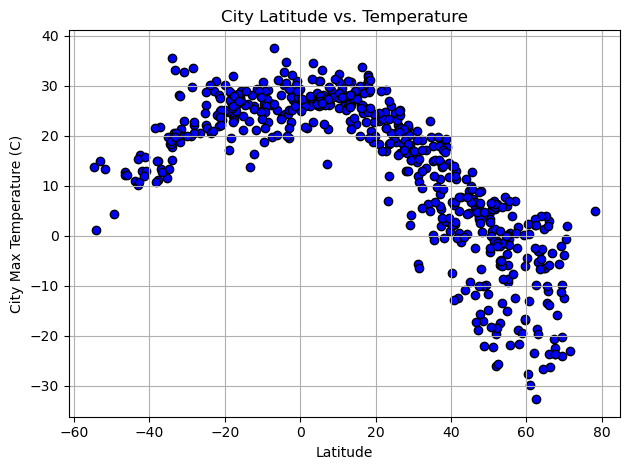

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("City Max Temperature (C)")
plt.title("City Latitude vs. Temperature")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

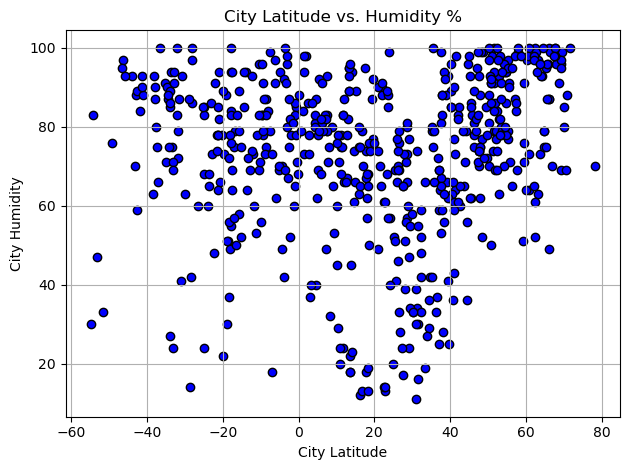

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],  marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Humidity")
plt.title("City Latitude vs. Humidity %")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

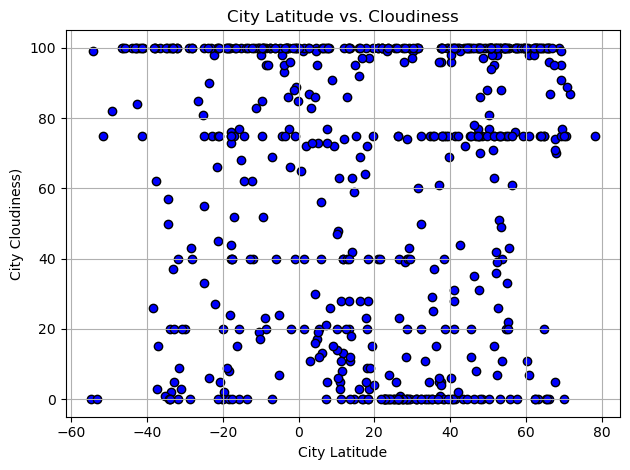

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

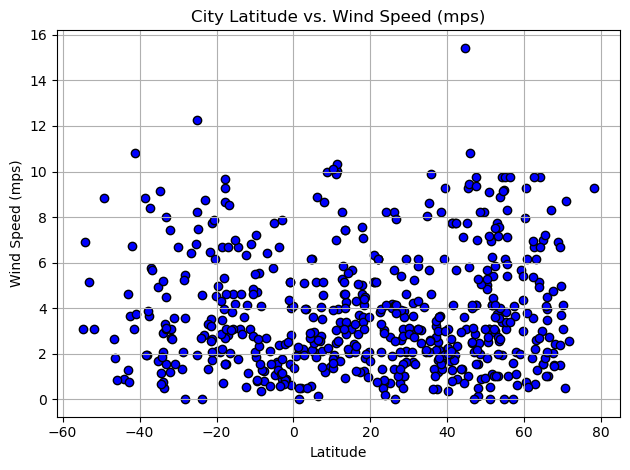

In [50]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.title("City Latitude vs. Wind Speed (mps)")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tosontsengel,48.7567,98.2839,-22.06,99,97,0.90,MN,1701111187
2,cadale,2.7603,46.3222,27.58,78,87,5.11,SO,1701111188
3,aykhal,66.0000,111.5000,-23.74,100,96,3.97,RU,1701111188
5,vilyuchinsk,52.9306,158.4028,-5.04,82,51,3.73,RU,1701111188
6,aasiaat,68.7098,-52.8699,-5.64,91,100,6.91,GL,1701111189


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.40,76,82,8.85,TF,1701111187
4,ushuaia,-54.8000,-68.3000,13.81,30,0,3.09,AR,1701111188
8,bredasdorp,-34.5322,20.0403,18.28,87,57,1.17,ZA,1701111189
9,port mathurin,-19.6833,63.4167,24.77,73,2,4.96,MU,1701111189
13,puerto ayora,-0.7393,-90.3518,30.98,85,89,4.02,EC,1701111191


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7513744049505602


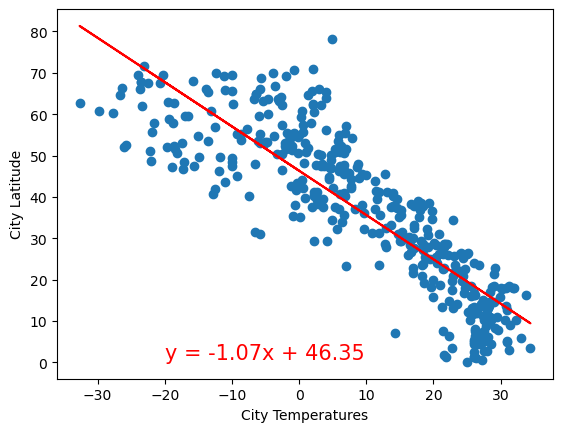

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0.8),fontsize=15,color="red")
plt.xlabel('City Temperatures')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.45598639077640246


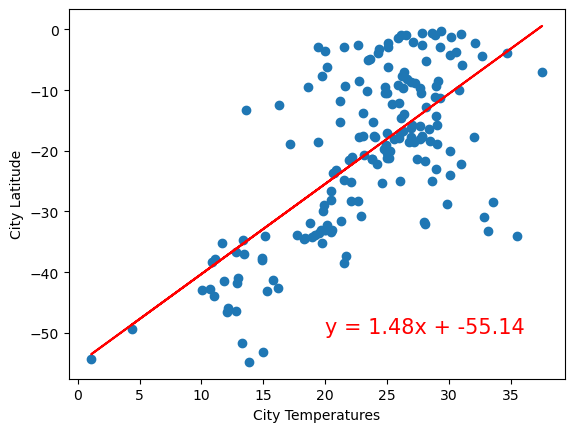

In [55]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('City Temperatures')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()



**Discussion about the linear relationship:** The Northern hemisphere has a very strong correlation between temperature and latitude as can be seen from the scatterplots above - the closer the latitude to the equator, the higher the temperature goes while conversely, the further away, the colder it gets! The r-squared score of the Northern hemi is almost 0.8.
In the Southern hemisphere, the r-squared score is less than 0.4 but there is still a relatively strong correlation between higher temperatures and distance from the equator.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1125299185970876


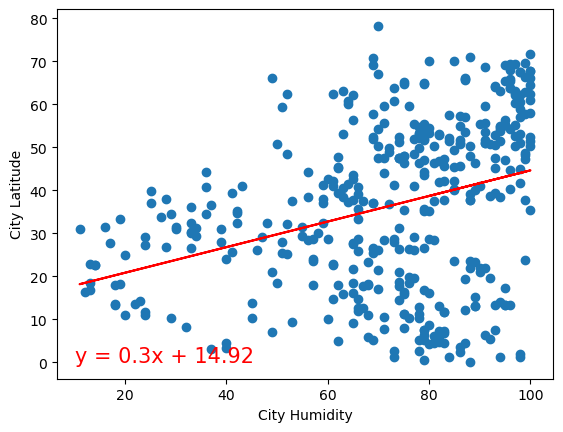

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('City Humidity')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 6.624825959348067e-05


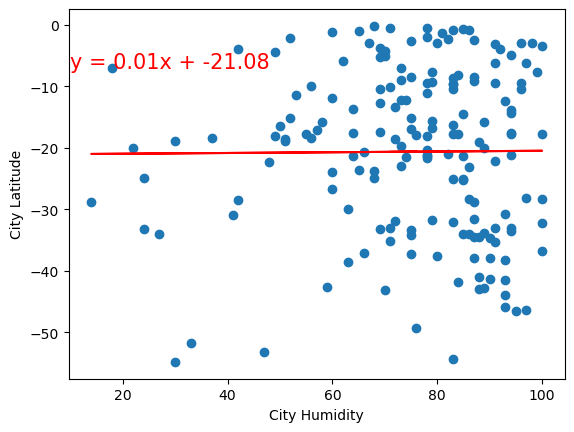

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-7
                     ),fontsize=15,color="red")
plt.xlabel('City Humidity')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a very slightly positive relationship between humidity and latitude in both the Northern and Southern Hemispheres as can be seen from the plots although both r-squared scores are less than 0.1 indicating that the relationship is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06272720612825065


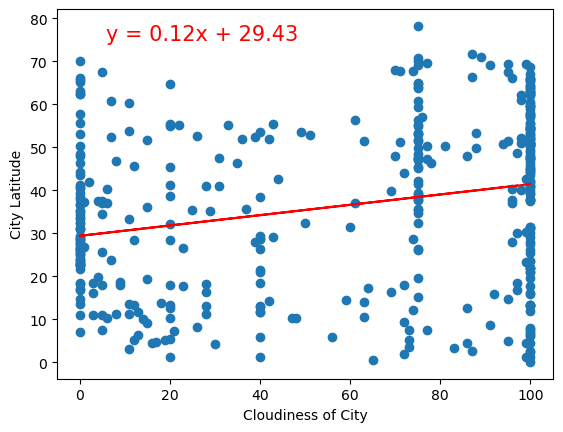

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,75),fontsize=15,color="red")
plt.xlabel('Cloudiness of City')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.016731342644068576


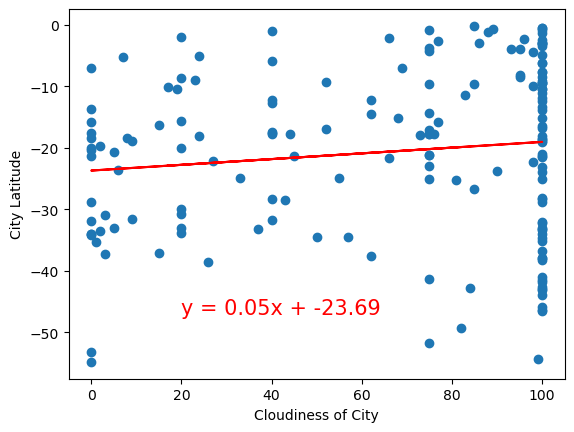

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, -47),fontsize=15,color="red")
plt.xlabel('Cloudiness of City')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is not a strong positive or negative correlation between Cloudiness and Latitude. Both scatterplots show almost perfectly horizontal lines and the r-squared scores are both ~ 0.03, solidifying this point.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.011900076961890138


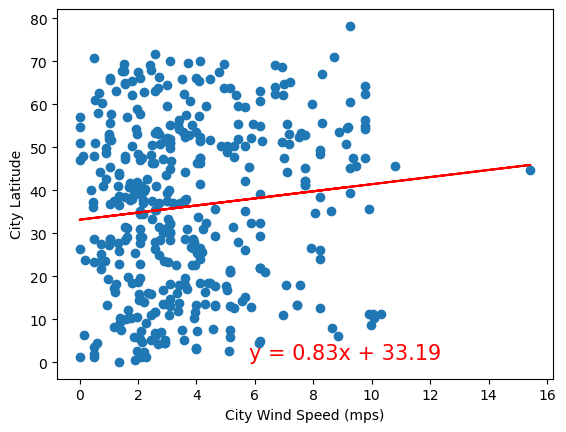

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('City Wind Speed (mps)')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02446573720656522


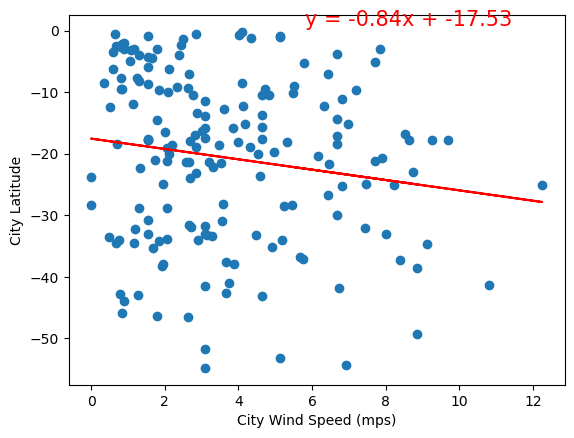

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('City Wind Speed (mps)')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There does not appear to be a strong positive or negative correlation between wind speed and latitude in either hemisphere.